In [333]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine, types
from sqlalchemy import text # to be able to pass string
from dotenv import dotenv_values

In [372]:
config = dotenv_values()
pg_user = config['POSTGRES_USER']
pg_host = config['POSTGRES_HOST']
pg_port = config['POSTGRES_PORT']
pg_db = config['POSTGRES_DB']
pg_schema = config['POSTGRES_SCHEMA']
pg_pass = config['POSTGRES_PASS']
url = f'postgresql://{pg_user}:{pg_pass}@{pg_host}:{pg_port}/{pg_db}'

engine = create_engine(url, echo=False)
engine.url


with engine.begin() as conn: 
    result = conn.execute(text(f'SET search_path TO {pg_schema};'))
    

engine = create_engine(url, echo=False)

data = pd.read_sql("SELECT * FROM capstone_group_1.all_data_13_to_18", engine)

In [373]:
data.columns

Index(['ID', 'gender', 'age', 'ethnicity', 'country_of_birth', 'us_citizen',
       'education_adult', 'education_adolescent', 'household_size',
       'no_of_kids_u6', 'no_of_kids_btw_6_17', 'total_income',
       'pregnancy_status', 'daily_calories', 'total_protein',
       'total_carbohydrates', 'total_sugar', 'total_water', 'total_fat',
       'mufa', 'pufa', 'cholesterin_diet', 'total_fiber', 'total_alcohol',
       'vit_a', 'vit_b1', 'vit_b2', 'vit_b3', 'vit_b6', 'vit_b9', 'vit_b12',
       'vit_c', 'vit_d_diet', 'vit_e', 'calcium', 'iron', 'zinc', 'sodium',
       'potassium', 'caffeine', 'weight', 'height', 'bmi',
       'waist_circumference', 'systolic_bp', 'diastolic_bp', 'pulse',
       'Pulse_60s', 'blood_glucose', 'insulin', 'cholesterin_lab',
       'triaclyglycerole', 'ldl', 'albumin', 'ALT',
       'gamma_glutamyl_transferase', 'alkaline_phosphatase', 'vit_d_lab',
       'urinary_creatinine', 'albumine', 'albumine_creatinine_ratio',
       'sport_vig_o_l_7_days', 'Work_

In [375]:
data["sitting_per_day"].value_counts().sort_index(ascending=False)

sitting_per_day
9999.0    110
7777.0      4
1380.0      1
1320.0      2
1200.0      9
         ... 
4.0         1
3.0         1
2.0         1
1.0         5
0.0         5
Name: count, Length: 63, dtype: int64

In [336]:
cols = [
    'gender', 'age', 'ethnicity', 'age', 'daily_calories', 
    'total_protein','total_carbohydrates', 'total_sugar', 
    'total_water', 'total_fat','total_fiber','vit_a', 'vit_b1',
    'vit_b2', 'vit_b3', 'vit_b6', 'vit_b9', 'vit_b12','vit_c', 
    'vit_d_diet', 'vit_e', 'sodium','weight', 'height', 'bmi',
    'waist_circumference', 'systolic_bp', 'diastolic_bp', 
    'Pulse_60s','cholesterin_lab','ldl','sport_vig_o_l_7_days', 
    'Work_days_with_vig_activity', 'walk_<10_minutes_p_day', 
    'sport_vig', 'sport_days', 'sitting_per_day','blood_glucose',
    'cig_p_d','alcoholic_drinks','BP_med', 'hours_sleeping'
    ]


In [337]:
df['sitting_per_day'].value_counts().sort_index(ascending=False) # minutes
df['sitting_per_day_cleaned'] = df['sitting_per_day'].replace([9999, 7777], np.nan)

# Schritt 2: Mittelwert berechnen (ohne die Platzhalter)
mean_val = df['sitting_per_day_cleaned'].mean()

# Schritt 3: NaN durch Mittelwert ersetzen
df['sitting_per_day_cleaned'] = df['sitting_per_day_cleaned'].fillna(mean_val)

In [338]:
df = data[cols]




In [339]:
df['Work_days_with_vig_activity'].value_counts() # Days
df['walk_<10_minutes_p_day'].value_counts() # Days
df['sport_vig_o_l_7_days'].value_counts()  # Days


sport_vig_o_l_7_days
2.0    15393
1.0     3783
9.0        8
7.0        1
Name: count, dtype: int64

In [340]:
colm = ['Work_days_with_vig_activity','walk_<10_minutes_p_day', 'sport_vig_o_l_7_days']
df_sub = df.loc[:,colm]
invalid_values = [77, 9, 99]
df_sub[colm] = df_sub[colm].apply(pd.to_numeric, errors='coerce')
df_sub[colm] = df_sub[colm].replace(invalid_values, np.nan)
df_sub["total_active_days"] = df_sub[colm].sum(axis=1, skipna=True)
df["total_active_days"] = df_sub["total_active_days"]

C:\Users\srnwn\AppData\Local\Temp\ipykernel_14064\1801696608.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_active_days"] = df_sub["total_active_days"]


In [341]:
df["total_active_days"]

0        2.0
1        2.0
2        2.0
3        0.0
4        2.0
        ... 
27718    2.0
27719    4.0
27720    2.0
27721    0.0
27722    2.0
Name: total_active_days, Length: 27723, dtype: float64

In [342]:
print(df['sport_vig'].value_counts()) # minutes 9999
print(df['sport_days'].value_counts()) # minutes 9999

sport_vig
60.0      1650
120.0      944
30.0       802
90.0       413
45.0       387
180.0      322
20.0       190
40.0       145
240.0      115
15.0       103
10.0        76
25.0        51
35.0        40
50.0        36
150.0       32
300.0       27
75.0        26
360.0       12
70.0        10
80.0         9
55.0         8
9999.0       6
11.0         4
105.0        4
480.0        4
18.0         3
12.0         3
47.0         3
14.0         2
420.0        2
100.0        2
65.0         2
115.0        2
600.0        1
46.0         1
72.0         1
31.0         1
29.0         1
44.0         1
330.0        1
270.0        1
17.0         1
34.0         1
190.0        1
210.0        1
43.0         1
63.0         1
135.0        1
38.0         1
85.0         1
230.0        1
23.0         1
209.0        1
Name: count, dtype: int64
sport_days
60.0      2256
30.0      1943
120.0      855
20.0       636
45.0       488
15.0       336
90.0       269
180.0      269
10.0       256
40.0       188
240.0   

In [343]:
colm = ['sport_vig','sport_days']
df_sub = df.loc[:,colm]
invalid_values = [7777, 9999]
df_sub[colm] = df_sub[colm].apply(pd.to_numeric, errors='coerce')
df_sub[colm] = df_sub[colm].replace(invalid_values, np.nan)
df_sub["total_sport_minutes"] = df_sub[colm].sum(axis=1, skipna=True)
df["total_sport_minutes"] = df_sub["total_sport_minutes"]

C:\Users\srnwn\AppData\Local\Temp\ipykernel_14064\1382833084.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["total_sport_minutes"] = df_sub["total_sport_minutes"]


In [344]:
df.columns
cols = ['gender', 'age', 'ethnicity', 'daily_calories', 'total_protein',
       'total_carbohydrates', 'total_sugar', 'total_water', 'total_fat',
       'total_fiber', 'vit_d_diet', 'sodium', 'weight',
       'height', 'bmi', 'waist_circumference', 'systolic_bp', 'diastolic_bp',
       'Pulse_60s', 'cholesterin_lab', 'ldl', 'sitting_per_day', 'blood_glucose', 'cig_p_d',
       'alcoholic_drinks', 'BP_med', 'hours_sleeping', 'total_active_days',
       'total_sport_minutes' ]
df_pca = df[cols]
df_pca["total_sport_minutes"].value_counts()

total_sport_minutes
0.0      17816
60.0      2015
30.0      1385
120.0     1361
90.0       692
         ...  
136.0        1
28.0         1
78.0         1
209.0        1
295.0        1
Name: count, Length: 108, dtype: int64

In [345]:
df_pca["total_active_days"].value_counts().sort_index(ascending=False)

total_active_days
15.0       70
14.0       39
13.0      123
12.0       83
11.0      164
10.0      116
9.0      1221
8.0       577
7.0      1424
6.0      1238
5.0       902
4.0       913
3.0       588
2.0     11716
1.0         5
0.0      8544
Name: count, dtype: int64

In [346]:
df_pca["total_sport_minutes"].value_counts().sort_index(ascending=False)

total_sport_minutes
900.0        1
840.0        1
780.0        1
720.0        2
660.0        1
         ...  
13.0         1
12.0         9
11.0         2
10.0       185
0.0      17816
Name: count, Length: 108, dtype: int64

In [347]:
import numpy as np
# df_pca
df_pca = df_pca.iloc[:, np.r_[0:1, 2:30]]

In [348]:
df_pca.columns

Index(['gender', 'age', 'ethnicity', 'daily_calories', 'total_protein',
       'total_carbohydrates', 'total_sugar', 'total_water', 'total_fat',
       'total_fiber', 'vit_d_diet', 'sodium', 'weight', 'height', 'bmi',
       'waist_circumference', 'systolic_bp', 'diastolic_bp', 'Pulse_60s',
       'cholesterin_lab', 'ldl', 'sitting_per_day', 'blood_glucose', 'cig_p_d',
       'alcoholic_drinks', 'BP_med', 'hours_sleeping', 'total_active_days',
       'total_sport_minutes'],
      dtype='object')

In [349]:
# df_pca.loc[:,["weight"]].isna().value_counts()

In [350]:
# for iterator in df_pca.columns:
#     print(df_pca.loc[:,[iterator]].isna().value_counts())

In [351]:
df_pca['gender'] = df_pca['gender'].map({'male': 1, 'female': 2})
df_pca['ethnicity'] = df_pca['ethnicity'].map({
    'white': 0,
    'black': 1,
    'asian': 2,
    'hispanic': 3,
    'mexican': 4,
    'others': 5
})

In [352]:
df_pca['cig_p_d'] = df_pca['cig_p_d'].fillna(1)
df_pca['BP_med'] = df_pca['BP_med'].replace(9, np.nan)
df_pca['BP_med'] = df_pca['BP_med'].fillna(2)


In [353]:
exclude = ['cig_p_d', 'alcoholic_drinks', 'BP_med']
numeric_cols = df_pca.select_dtypes(include=[np.number]).columns
cols_to_fill = [col for col in numeric_cols if col not in exclude]


In [354]:
for col in cols_to_fill:
    df_pca[col] = df_pca[col].fillna(df_pca[col].mean())

In [355]:
df_pca['alcoholic_drinks'] = df_pca['alcoholic_drinks'].fillna(1)

In [ ]:
df_pca # -> Clean Dataset! woop woop

,gender,age,ethnicity,daily_calories,total_protein,total_carbohydrates,total_sugar,total_water,total_fat,total_fiber,...,cholesterin_lab,ldl,sitting_per_day,blood_glucose,cig_p_d,alcoholic_drinks,BP_med,hours_sleeping,total_active_days,total_sport_minutes
0,1,69,1,1574.0,43.63,239.59,176.47,960.00,52.81,10.8,...,167.0,106.895379,600.000000,109.051577,1.0,1.0,2.0,7.000000,2.0,0.0
1,1,54,0,5062.0,338.13,423.78,44.99,360.00,124.29,16.7,...,170.0,106.895379,540.000000,109.051577,1.0,4.0,2.0,9.000000,2.0,0.0
2,1,72,0,1743.0,64.61,224.39,102.90,1254.00,65.97,9.9,...,126.0,56.000000,300.000000,193.000000,1.0,1.0,1.0,8.000000,2.0,180.0
3,1,9,0,1490.0,77.75,162.92,80.58,225.00,58.27,10.6,...,168.0,106.895379,448.843507,109.051577,1.0,1.0,2.0,7.468171,0.0,0.0
4,2,73,0,1421.0,55.24,178.20,87.78,240.00,55.36,12.3,...,201.0,101.000000,480.000000,107.000000,1.0,1.0,1.0,9.000000,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27718,2,70,2,1080.0,52.59,139.92,31.31,1267.50,38.68,28.7,...,119.0,43.000000,120.000000,158.000000,1.0,1.0,2.0,8.500000,2.0,60.0
27719,1,42,4,3072.0,188.17,333.41,77.34,2896.13,114.96,57.0,...,182.0,106.895379,360.000000,109.051577,1.0,12.0,2.0,6.000000,4.0,0.0
27720,2,41,1,1757.0,72.70,218.10,69.20,2700.00,66.58,9.5,...,172.0,108.000000,600.000000,94.000000,1.0,1.0,2.0,8.000000,2.0,30.0
27721,2,14,1,1256.0,29.62,192.73,119.48,1014.00,44.11,10.2,...,150.0,106.895379,448.843507,109.051577,1.0,1.0,2.0,7.468171,0.0,0.0


In [357]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [358]:
# Daten skalieren (nur numerische Spalten verwenden)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_pca)

In [359]:
pca = PCA(n_components=2)  # z. B. für 2D-Visualisierung
X_pca = pca.fit_transform(X_scaled)

# Als DataFrame abspeichern
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

In [360]:
print("Erklärte Varianz pro Komponente:", pca.explained_variance_ratio_)
print("Kumulierte Varianz:", np.cumsum(pca.explained_variance_ratio_))

Erklärte Varianz pro Komponente: [0.19571018 0.13989634]
Kumulierte Varianz: [0.19571018 0.33560652]


In [361]:
pca = PCA(n_components=0.95)  # Automatisch so viele PCs wie nötig
X_pca = pca.fit_transform(X_scaled)

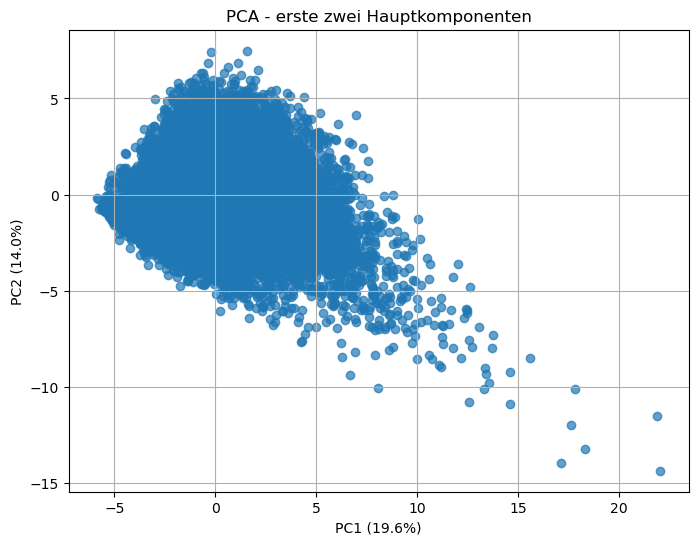

In [362]:
plt.figure(figsize=(8,6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], alpha=0.7)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)")
plt.title("PCA - erste zwei Hauptkomponenten")
plt.grid(True)
plt.show()

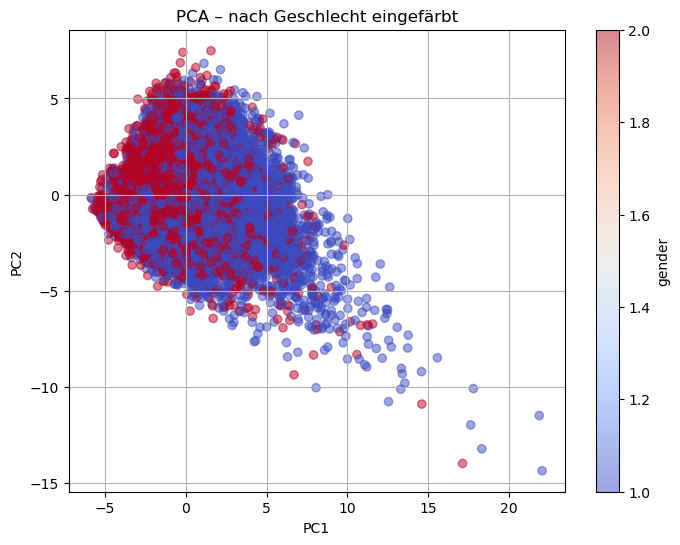

In [363]:
pca_df["gender"] = df_pca["gender"].values  # oder ethnicity
plt.figure(figsize=(8,6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], c=pca_df["gender"], cmap='coolwarm', alpha=0.5)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA – nach Geschlecht eingefärbt")
plt.colorbar(label='gender')
plt.grid(True)
plt.show()

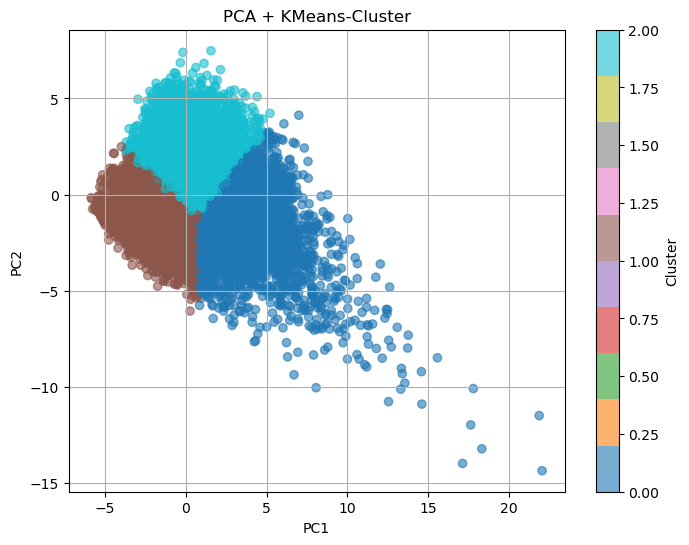

In [364]:
from sklearn.cluster import KMeans

# Cluster berechnen
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Cluster als neue Spalte
pca_df['cluster'] = clusters

# Visualisierung
plt.figure(figsize=(8,6))
plt.scatter(pca_df["PC1"], pca_df["PC2"], c=pca_df["cluster"], cmap='tab10', alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA + KMeans-Cluster")
plt.colorbar(label="Cluster")
plt.grid(True)
plt.show()

c:\Users\srnwn\miniconda3\lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


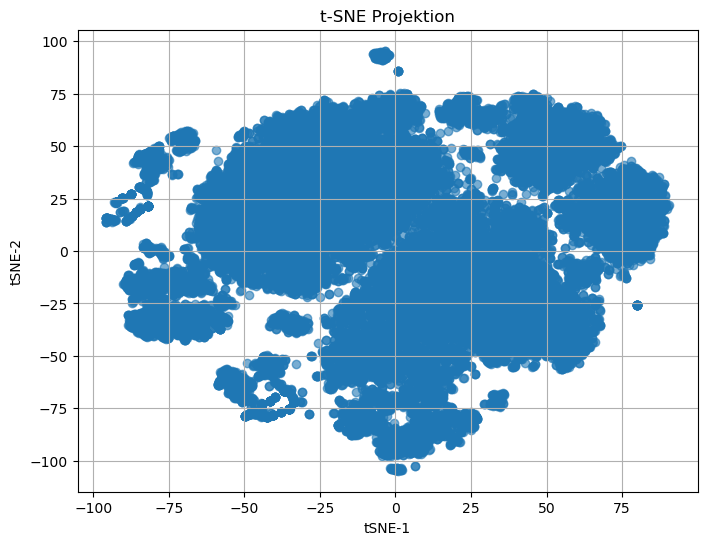

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# t-SNE reduzieren (z. B. auf 2 Komponenten)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.6)
plt.title("t-SNE Projektion")
plt.xlabel("tSNE-1")
plt.ylabel("tSNE-2")
plt.colorbar(label='gender')
plt.grid(True)
plt.show()

c:\Users\srnwn\miniconda3\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\srnwn\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\srnwn\miniconda3\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


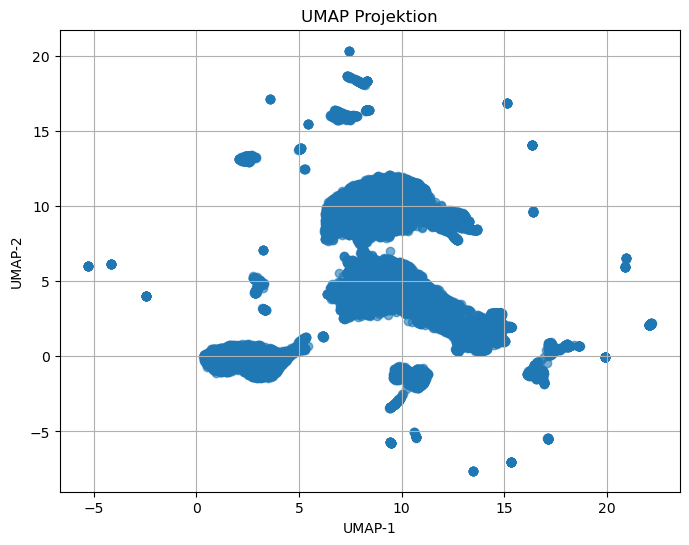

In [ ]:
import umap.umap_ as umap

# UMAP-Reduktion
umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8,6))
plt.scatter(X_umap[:, 0], X_umap[:, 1], alpha=0.6)
plt.title("UMAP Projektion")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.colorbar(label='gender')
plt.grid(True)
plt.show()

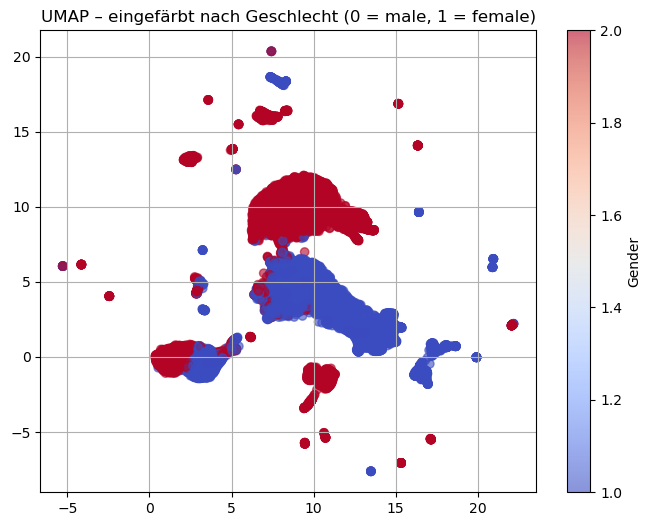

In [369]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1],
                      c=df_pca['gender'], cmap='coolwarm', alpha=0.6)
plt.title("UMAP – eingefärbt nach Geschlecht (0 = male, 1 = female)")
plt.colorbar(scatter, label="Gender")
plt.grid(True)
plt.show()

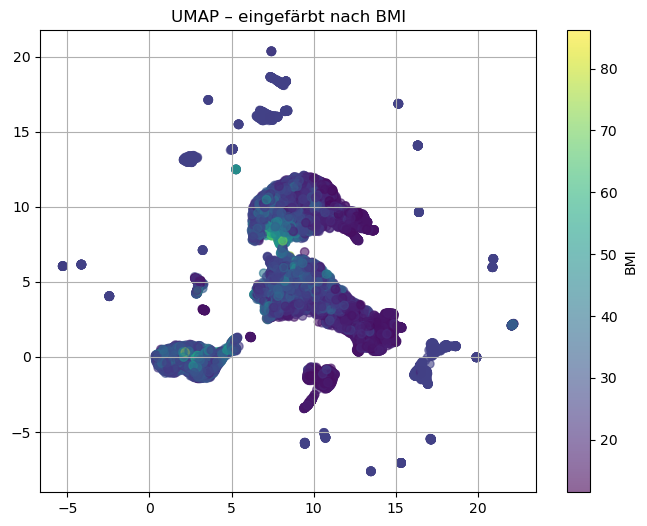

In [370]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1],
                      c=df_pca['bmi'], cmap='viridis', alpha=0.6)
plt.title("UMAP – eingefärbt nach BMI")
plt.colorbar(scatter, label="BMI")
plt.grid(True)
plt.show()

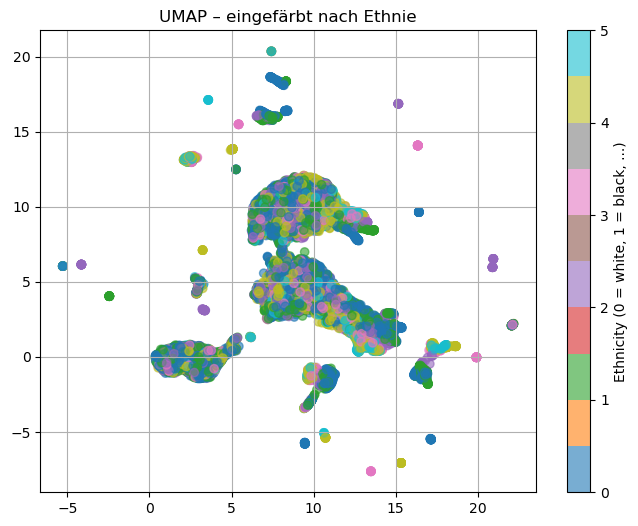

In [371]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1],
                      c=df_pca['ethnicity'], cmap='tab10', alpha=0.6)
plt.title("UMAP – eingefärbt nach Ethnie")
plt.colorbar(scatter, label="Ethnicity (0 = white, 1 = black, ...)")
plt.grid(True)
plt.show()

In [399]:
# RF
data = df_pca
data.columns

Index(['gender', 'age', 'ethnicity', 'daily_calories', 'total_protein',
       'total_carbohydrates', 'total_sugar', 'total_water', 'total_fat',
       'total_fiber', 'vit_d_diet', 'sodium', 'weight', 'height', 'bmi',
       'waist_circumference', 'systolic_bp', 'diastolic_bp', 'Pulse_60s',
       'cholesterin_lab', 'ldl', 'sitting_per_day', 'blood_glucose', 'cig_p_d',
       'alcoholic_drinks', 'BP_med', 'hours_sleeping', 'total_active_days',
       'total_sport_minutes', 'hypertension'],
      dtype='object')

In [400]:
data['hypertension']

0        0
1        1
2        1
3        0
4        1
        ..
27718    1
27719    0
27720    0
27721    0
27722    1
Name: hypertension, Length: 27723, dtype: int64

In [415]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# CSV oder DataFrame laden
data['hypertension'] = ((data['systolic_bp'] >= 130) | (data['diastolic_bp'] >= 80)).astype(int)

df = data
# Zielvariable und Features
target = 'hypertension'
X = df.drop(columns=[target, "systolic_bp", "diastolic_bp"])
y = df[target]

In [416]:
X = pd.get_dummies(X, columns=['gender', 'ethnicity'], drop_first=True)

In [417]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [418]:
# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modell wählen und trainieren
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [419]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Bewertung
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      4224
           1       0.58      0.45      0.51      1321

    accuracy                           0.79      5545
   macro avg       0.71      0.67      0.69      5545
weighted avg       0.78      0.79      0.78      5545

ROC-AUC: 0.8597545764228203


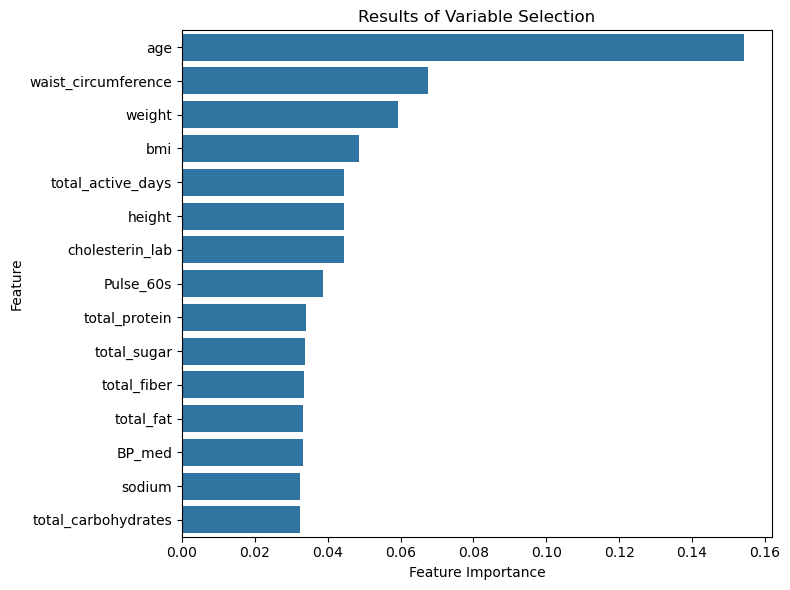

In [420]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importance = pd.Series(model.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(x=top_features, y=top_features.index)
plt.title("Results of Variable Selection")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

C:\Users\srnwn\AppData\Local\Temp\ipykernel_14064\4038234944.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")


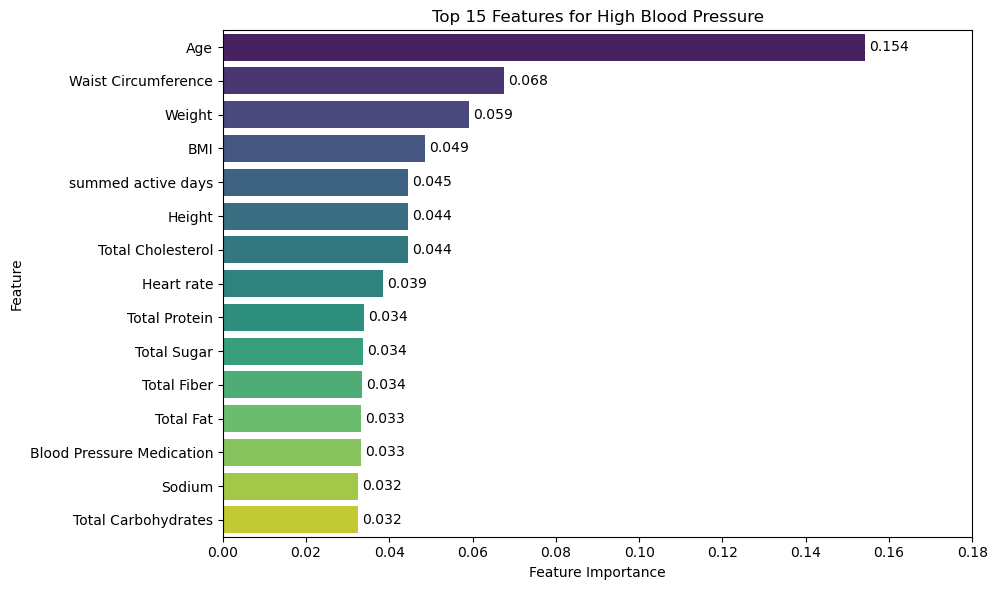

In [ ]:
feature_name_map = {
    'systolic_bp': 'systolic BP',
    'diastolic_bp': 'diastolic BP',
    'age': 'Age',
    'waist_circumference': 'Waist Circumference',
    'weight': 'Weight',
    'total_active_days': 'summed active days',
    'BP_med': 'Blood Pressure Medication',
    'total_fiber': 'Total Fiber',
    'total_carbohydrates': 'Total Carbohydrates',
    'total_protein': 'Total Protein',
    'total_sugar': 'Total Sugar',
    'height': 'Height',
    'sitting_per_day': 'minutes sitting per day',
    'cholesterin_lab': 'Total Cholesterol',
    'bmi': 'BMI',
    'Pulse_60s': 'Heart Rate',
    'blood_glucose': 'Blood Sugar',
    'total_fat': 'Total Fat',
    'sodium': 'Sodium'
}


import matplotlib.pyplot as plt
import seaborn as sns

# Feature Importance Serie mit schönem Namen (wenn vorhanden)
importance_series = pd.Series(model.feature_importances_, index=X.columns)

# Mapping der Namen
renamed_series = importance_series.rename(index=lambda x: feature_name_map.get(x, x))

# Top N Features auswählen
top_features = renamed_series.sort_values(ascending=False).head(15)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_features.values, y=top_features.index, palette="viridis")

# Werte daneben schreiben
for i, (value, name) in enumerate(zip(top_features.values, top_features.index)):
    ax.text(value + 0.001, i, f"{value:.3f}", va='center')

plt.title("Top 15 Features for High Blood Pressure")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.xlim(0, 0.18)
plt.show()